In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt

In [2]:
# Importing the proteins data
ns5 = []
ns5d = []

f = open("../../../../../../Data/Proteins/DENV1/NS5/DENV1_NS5.txt", "r")
for x in f:   
    if "DSS" in x:
        ns5d.append(1)
    elif "DHF" in x:
        ns5d.append(1)
    elif x[0] == ">":
        ns5d.append(0)
    else:
        x = x.replace("\n", "")
        ns5.append(x)

In [3]:
# Converting the array into DataFrames
ns5 = pd.DataFrame(ns5)

# Attaching the "Disease" label column to the input
ns5["Disease"] = ns5d

# Renaming the columns
ns5 = ns5.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [4]:
print("The combined shape of the given data is:", str(ns5.shape))
print("The length of the combined data is:", str(len(ns5.index)))
print("Does the combined data have any null value? ->", ns5.isnull().values.any())

ns5 = ns5.dropna(how = 'any',axis = 0) 

# Shuffling the data and then taking a peek
ns5 = ns5.sample(frac = 1)
print(ns5.head())

The combined shape of the given data is: (999, 2)
The length of the combined data is: 999
Does the combined data have any null value? -> False
                                              Sequence  Disease
141  GTGAQGETLGEKWKRQLNQLSKSEFNTYKRSGIMEVDRSEAKEGLK...        0
701  GTGAQGETLGEKWKRQLNQLSKSEFNTYKRSGIMEVDRSEAKEGLK...        1
319  GTGAQGETLGEKWKRQLNQLSKSEFNTYKRSGIMEVDRSEAKEGLK...        0
587  GTGAQGETLGEKWKRQLNQLSKSEFNIYKRSGIIEVDRSEAKEGLK...        0
213  GTGAQGETLGEKWKRQLNQLSKSEFNTYKRSGIMEVDRSEAKEGLK...        0


In [5]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x + size].lower() for x in range(len(sequence) - size + 1)]

ns5['words'] = ns5.apply(lambda x: getKmers(x['Sequence']), axis = 1)
ns5 = ns5.drop('Sequence', axis=1)

ns5_texts = list(ns5['words'])
for item in range(len(ns5_texts)):
    ns5_texts[item] = ' '.join(ns5_texts[item])

The shape of y is: (999,)


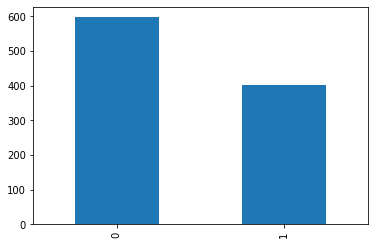

In [6]:
# Creating y and printing the shape of it
y = ns5.iloc[:, 0].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
ns5["Disease"].value_counts().sort_index().plot.bar()

In [7]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4))
x = cv.fit_transform(ns5_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (999, 4079)


## Nested Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 30)
# empty list to store scores
k_scores = []

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
    print("The score for number of neighbours =", k, "is:", scores.mean())

The score for number of neighbours = 1 is: 0.5564775477547755
The score for number of neighbours = 2 is: 0.5977098709870987
The score for number of neighbours = 3 is: 0.6085401540154016
The score for number of neighbours = 4 is: 0.6046607660766077
The score for number of neighbours = 5 is: 0.5977104710471047
The score for number of neighbours = 6 is: 0.5977395739573959
The score for number of neighbours = 7 is: 0.6036098609860986
The score for number of neighbours = 8 is: 0.6066094609460947
The score for number of neighbours = 9 is: 0.6146704670467047
The score for number of neighbours = 10 is: 0.6086601660166016
The score for number of neighbours = 11 is: 0.6116498649864986
The score for number of neighbours = 12 is: 0.6056593659365936
The score for number of neighbours = 13 is: 0.6016191619161917
The score for number of neighbours = 14 is: 0.5966793679367938
The score for number of neighbours = 15 is: 0.5946286628662866
The score for number of neighbours = 16 is: 0.6076001600160016
T

Length of list 29
Max of list 0.6156102610261026


Text(0, 0.5, 'Cross-validated accuracy')

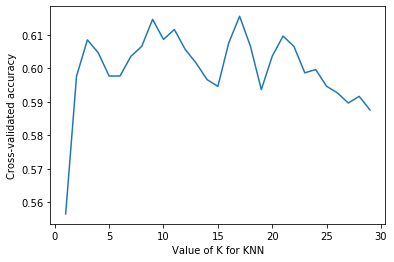

In [10]:
# in essence, this is basically running the k-fold cross-validation method 30 times because
# we want to run through K values from 1 to 30.
# we should have 21 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')